In [ ]:
import pandas as pd
import numpy as np
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. CKD Exploratory Data Analysis**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Chronic_Kidney_Dsease_data.csv")
data

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,...,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,...,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,...,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,...,3.432765,31.858023,0,0,0,0.560298,2.744519,0.322592,1,Confidential


In [ ]:
# Getting an overview of the data's attributes
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [ ]:
# Dropping irrelevant attributes 'PatientID' and 'DoctorInChange'
data = data.copy()
data.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)

In [ ]:
data.shape

(1659, 52)

In [ ]:
print(data.duplicated().sum())

0


In [ ]:
# Analysing the attributes by their mean, interquartile range and std to
# root out any outliers
data.describe()

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,5.028544,...,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,2.865777,...,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,0.002407,...,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,2.558443,...,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,4.989810,...,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,7.428290,...,5.254956,7.552093,73.913997,0.000000,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000
max,90.000000,1.000000,3.00000,2.000000,3.000000,39.993532,1.000000,19.992713,9.998167,9.998927,...,6.984636,9.998313,99.987510,1.000000,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000


<Axes: >

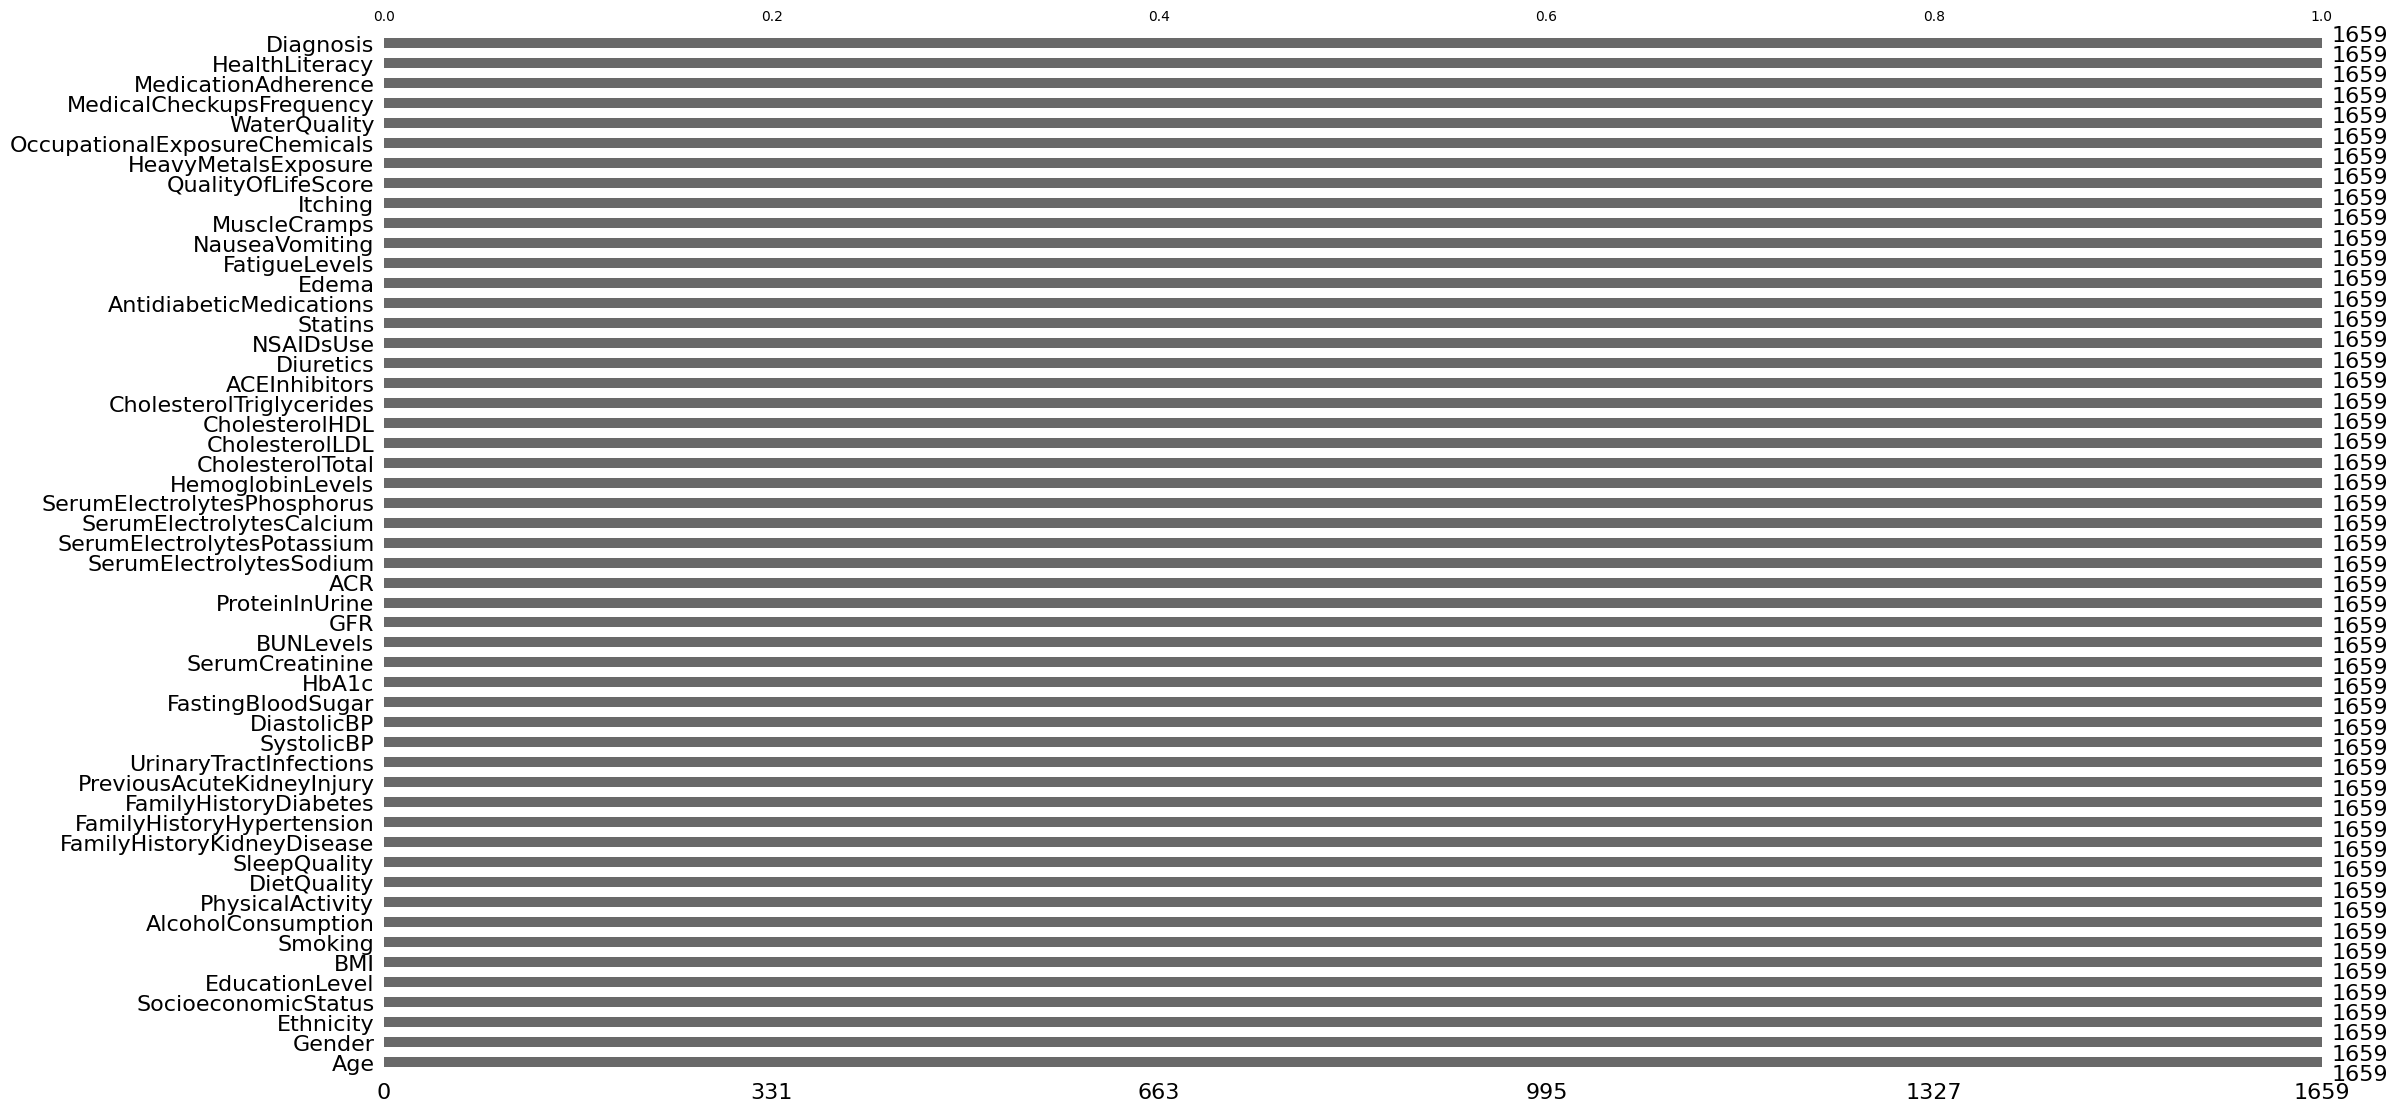

In [ ]:
# Looking for null values
msn.bar(data)

<Axes: >

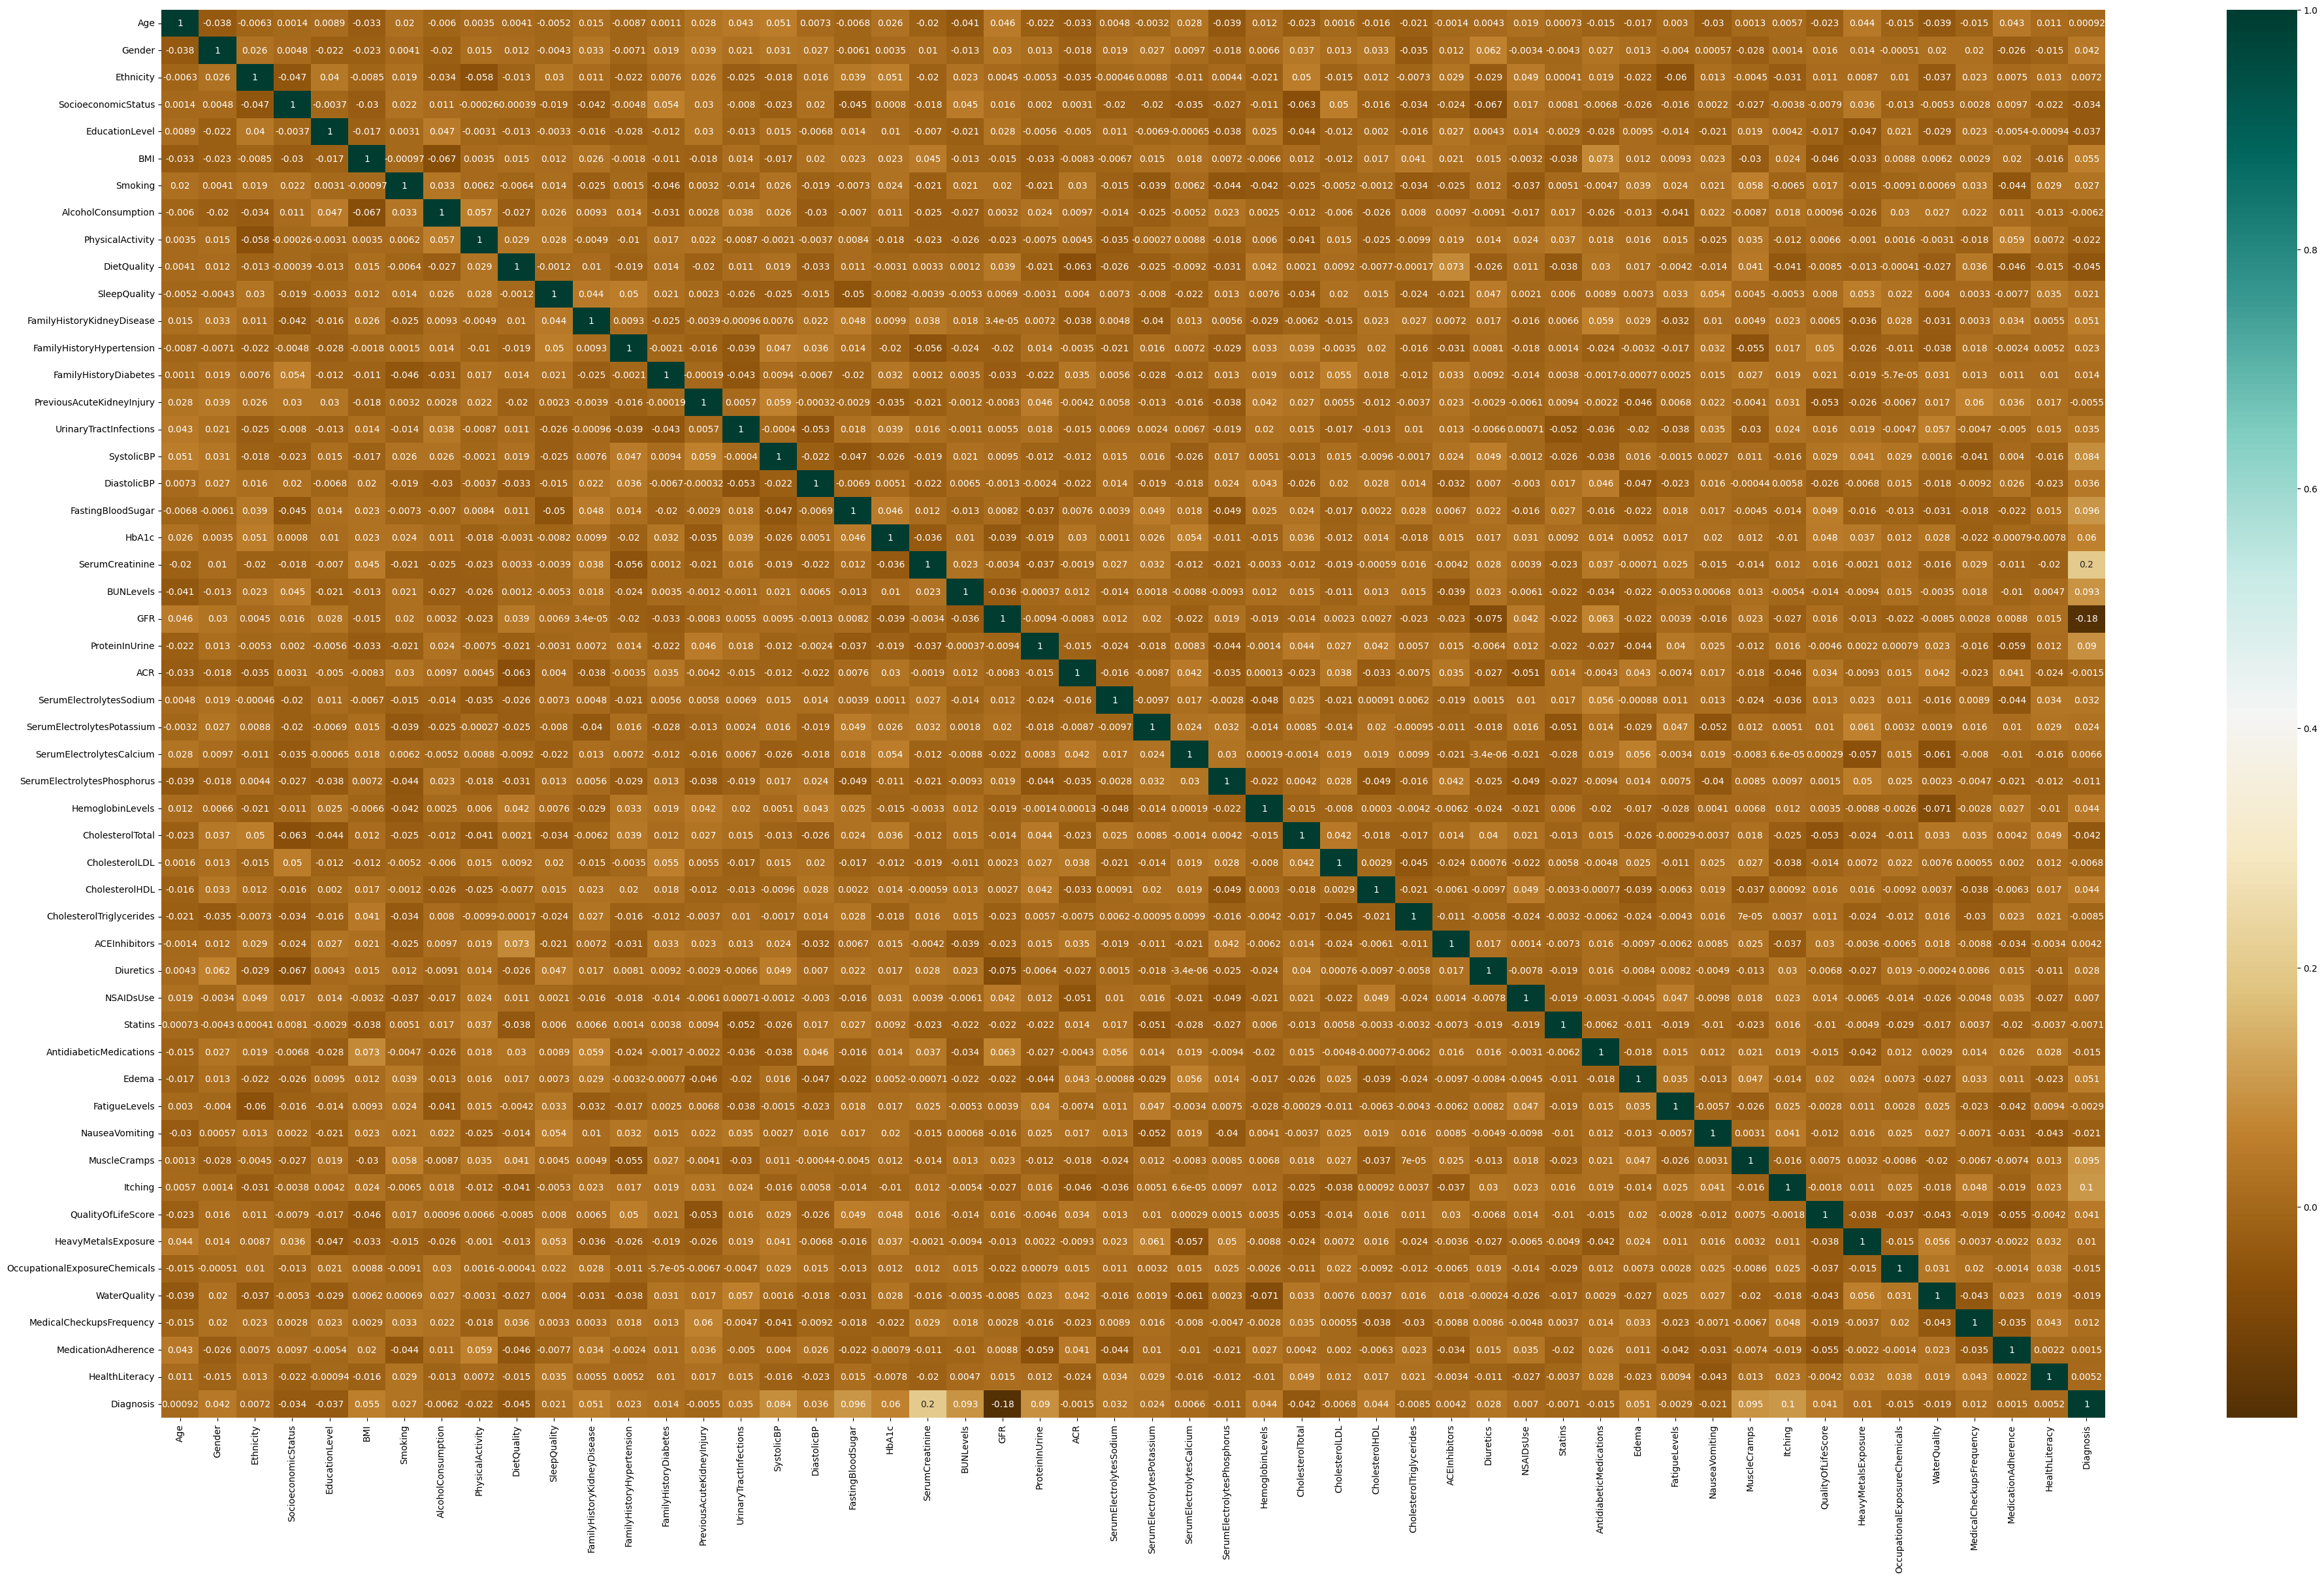

In [ ]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(48, 28))
sns.heatmap(corrmat, annot=True, cmap='BrBG')

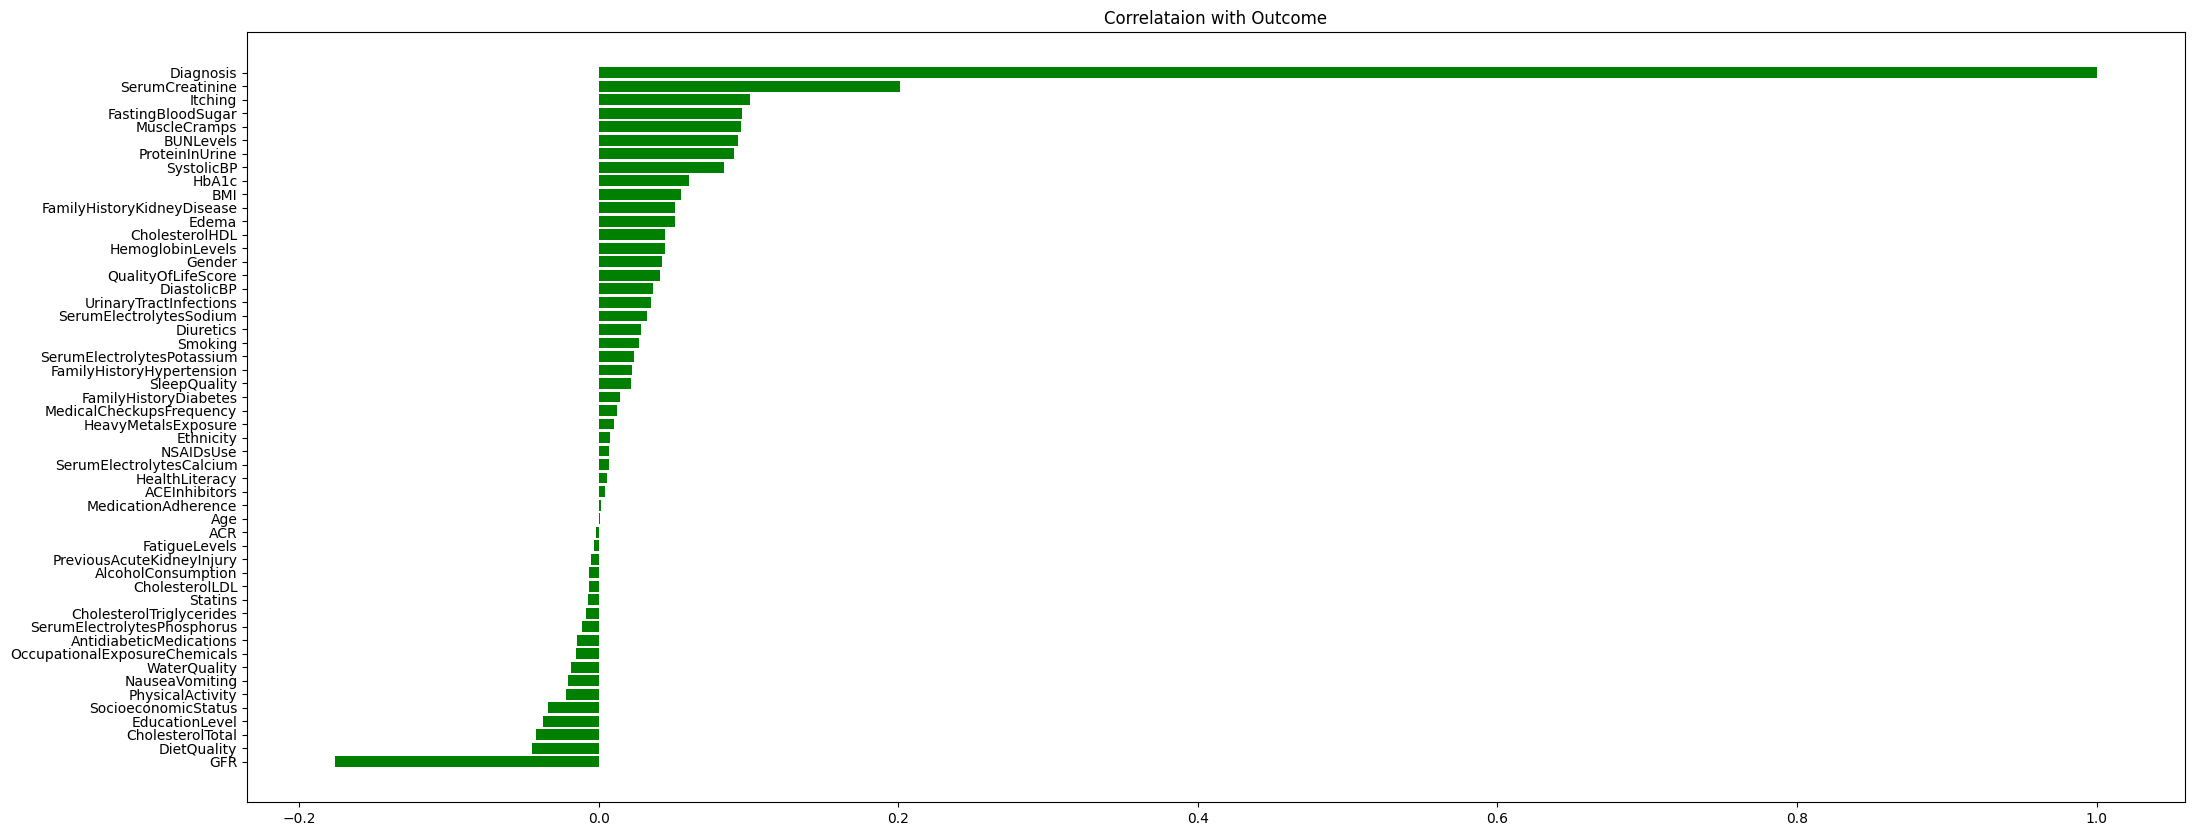

In [ ]:
corr = plt.figure(figsize = (25, 10))
outcome_corr = pd.DataFrame(data.corr()['Diagnosis'].sort_values(ascending = True))
plt.barh(outcome_corr.index, outcome_corr['Diagnosis'],color="green")
plt.title('Correlataion with Outcome')
plt.show()

In [ ]:
# Iteration: Handpicked variables restricted to blood test values, age, gender and bmi, and other variables with high correlation in the heatmap
features = ['BMI', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels',
            'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium',
            'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels',
            'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MuscleCramps', 'Itching','Diagnosis']

features_1 = ['FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels',
            'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium',
            'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels',
            'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'Diagnosis']

cleaned = data[features].copy()
cleaned

,BMI,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MuscleCramps,Itching,Diagnosis
0,31.069414,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,4.518513,7.556302,1
1,29.692119,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,2.202222,6.836766,1
2,37.394822,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,5.967271,2.144722,1
3,31.329680,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,2.176387,7.077188,1
4,23.726311,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,6.800993,3.553118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,39.677059,195.433613,7.309465,2.191402,23.207131,80.644448,2.926489,240.575604,137.142172,5.277706,9.867489,3.177054,14.331815,184.518899,133.107066,30.859157,320.668245,6.972093,2.138976,0
1655,28.922015,73.606489,4.357399,0.584633,27.145254,118.026779,3.496617,207.392143,136.744038,3.883738,9.411840,2.626317,11.397473,253.709988,131.987735,27.157762,334.818155,0.465297,7.911566,0
1656,21.951219,163.084321,8.235078,0.527432,29.733737,19.283249,3.549633,105.821102,143.887896,4.051049,8.705635,4.246865,16.727631,221.399305,183.307380,51.888571,162.784996,2.281970,0.015531,0
1657,24.964149,98.794331,6.298927,1.417972,15.773740,68.770181,3.816679,194.140915,139.957047,3.717296,10.212417,4.358599,12.620439,261.911664,184.376784,26.189089,389.349914,0.257814,3.432765,1


In [ ]:
cleaned.var()

,0
BMI,53.124714
FastingBloodSugar,1336.855508
HbA1c,3.009232
SerumCreatinine,1.734932
BUNLevels,164.046449
GFR,903.052717
ProteinInUrine,2.101616
ACR,7542.972372
SerumElectrolytesSodium,8.442485
SerumElectrolytesPotassium,0.341013


In [ ]:
cleaned.shape

(1659, 17)

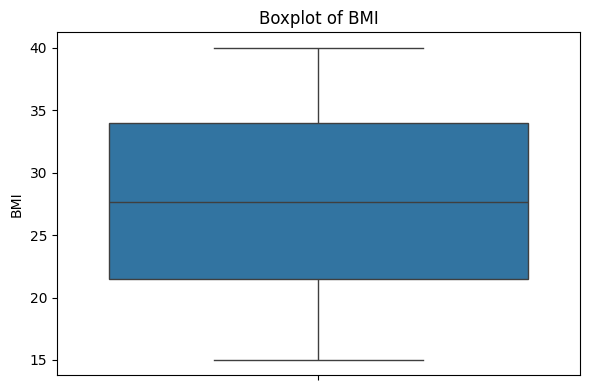

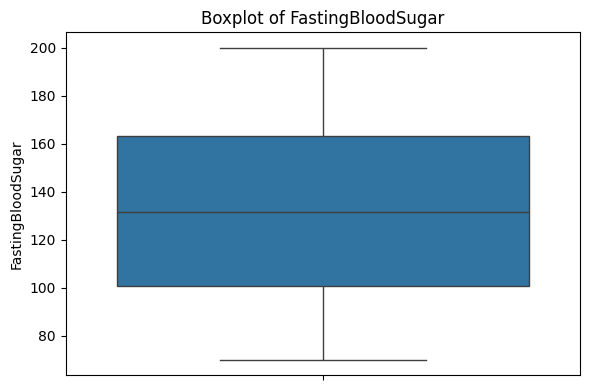

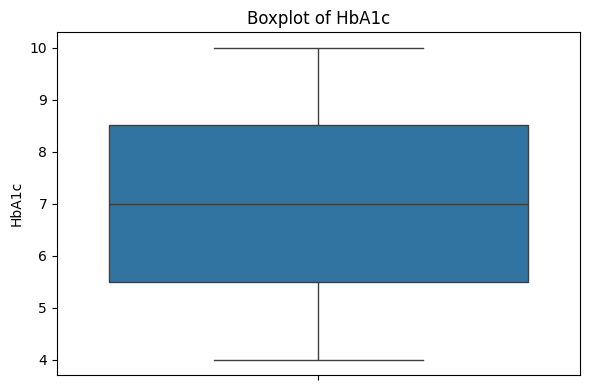

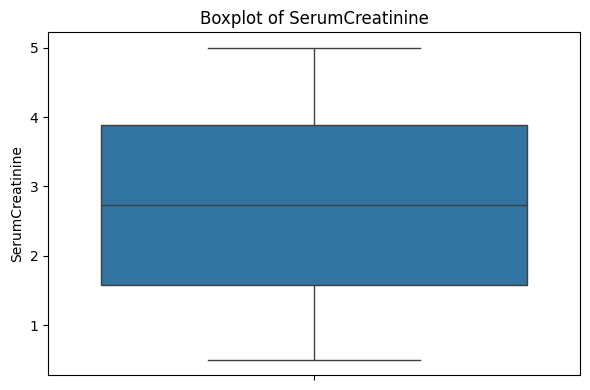

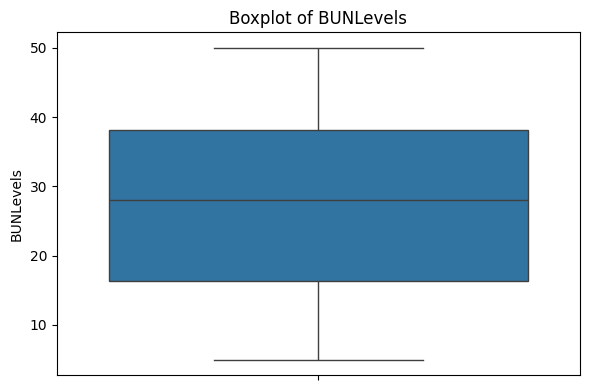

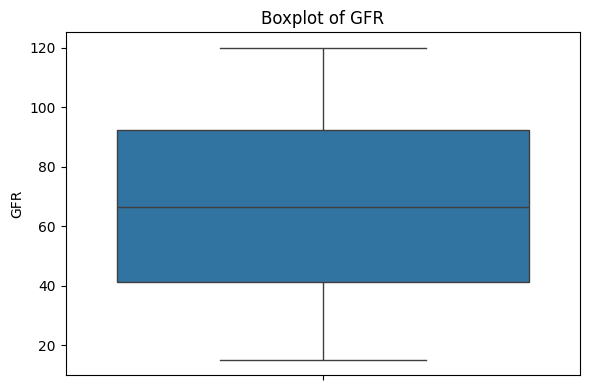

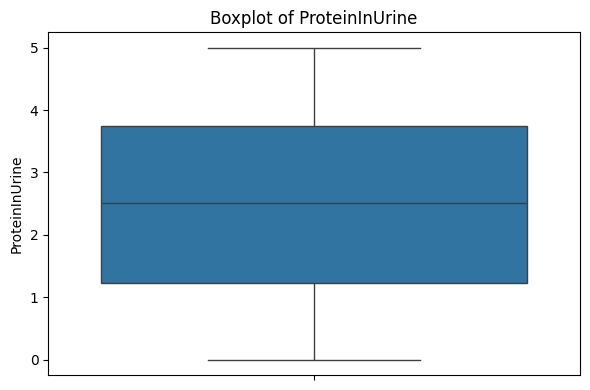

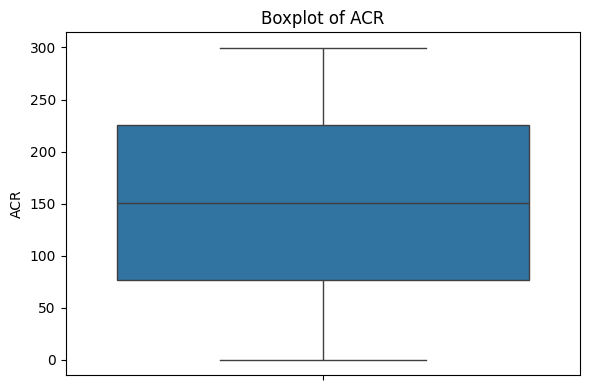

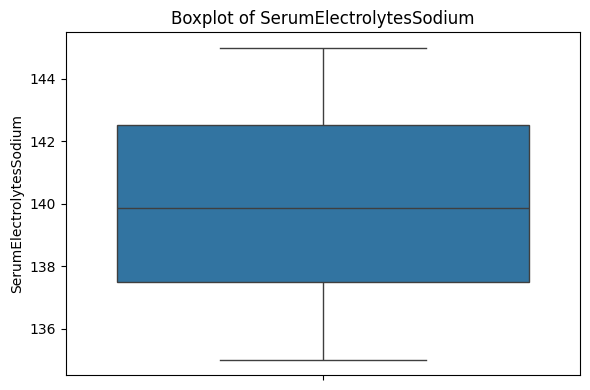

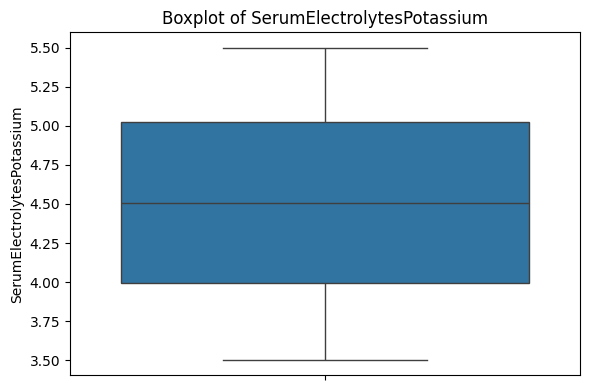

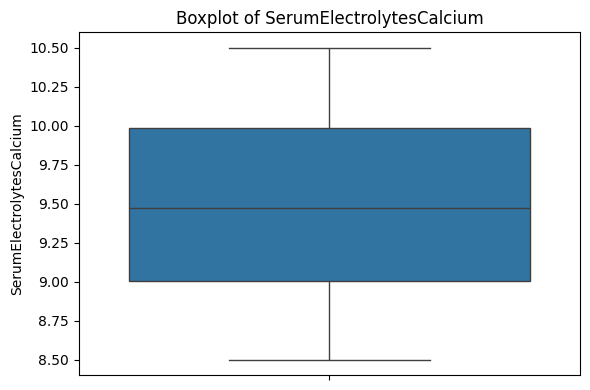

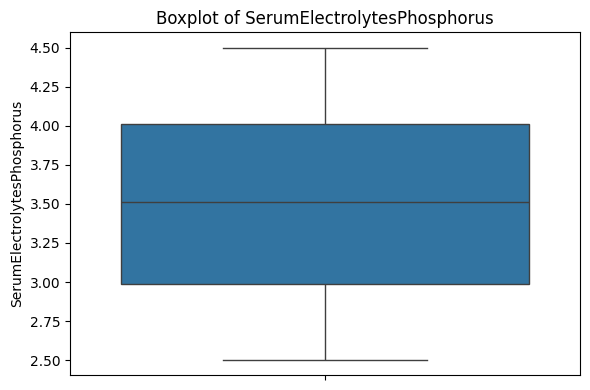

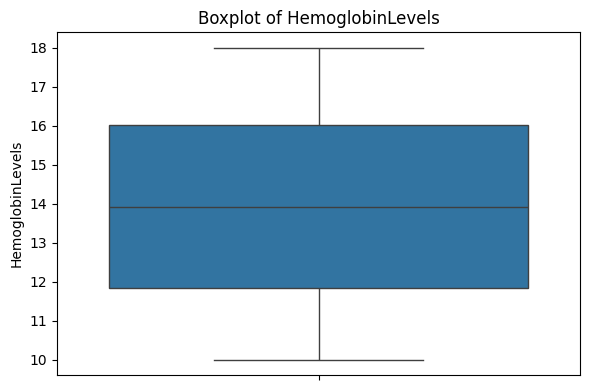

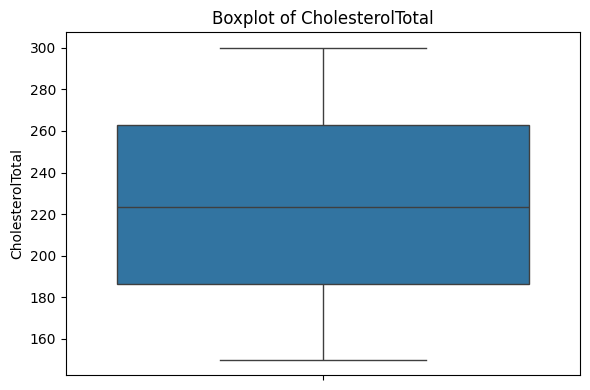

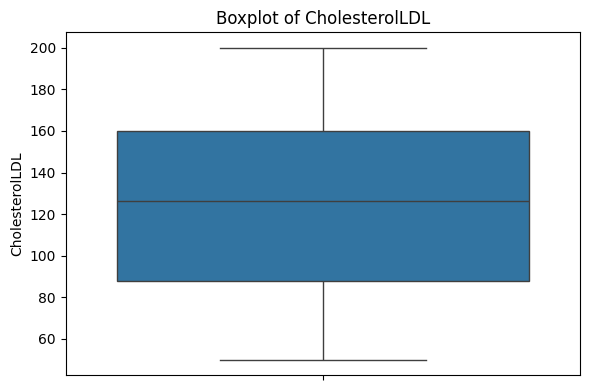

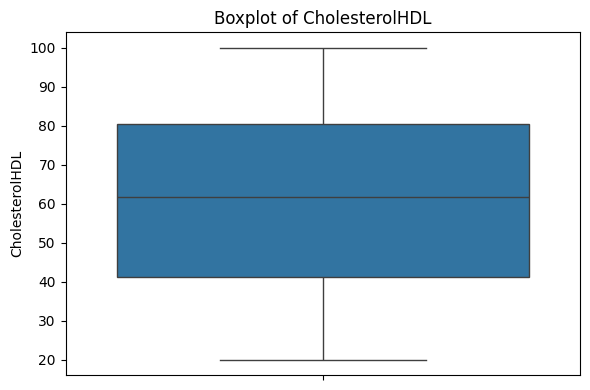

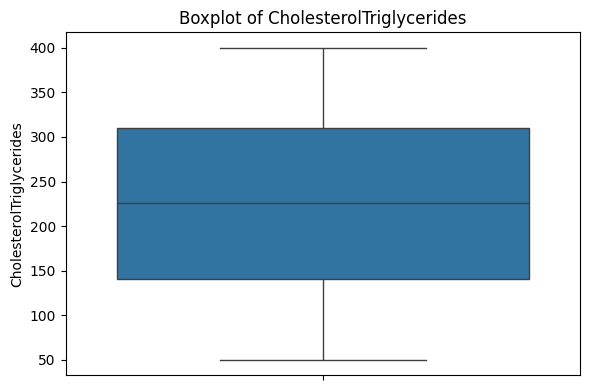

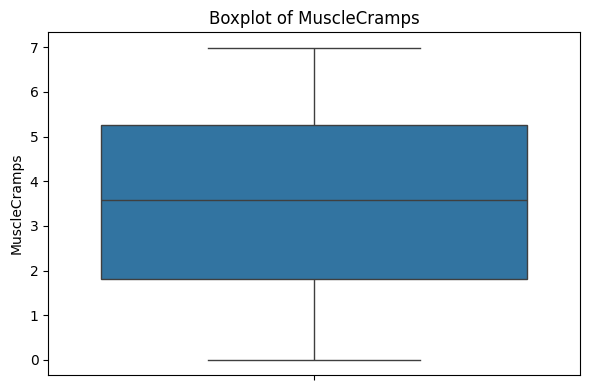

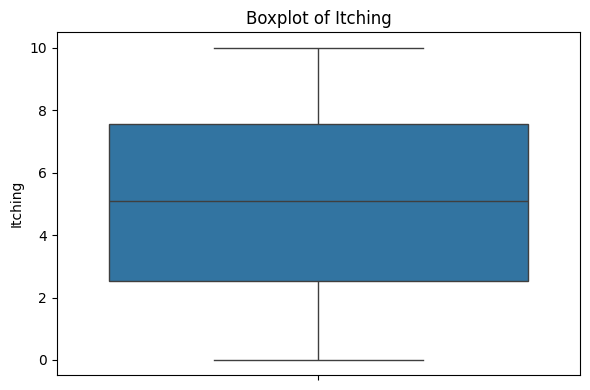

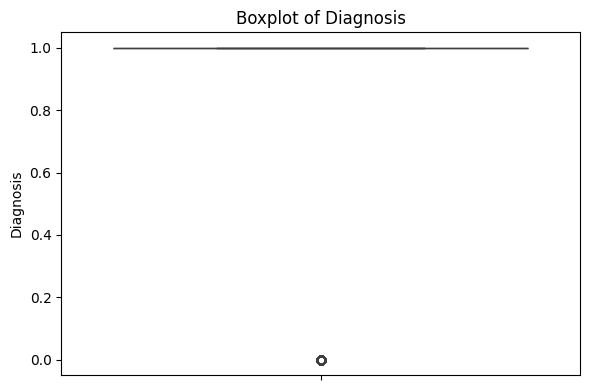

In [ ]:
for column in cleaned.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

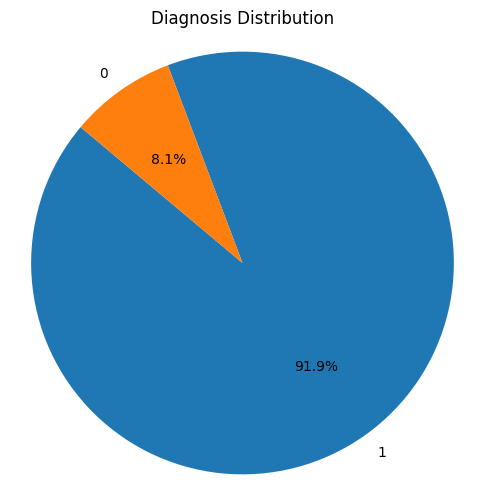

In [ ]:
# Visualising the data to see if there exists an imbalance in
# outcome classes (0 or 1)

diagnosis = data['Diagnosis'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(diagnosis, labels=diagnosis.index, autopct='%1.1f%%', startangle=140)
plt.title('Diagnosis Distribution')
plt.axis('equal')
plt.show()


In [ ]:
df = cleaned.copy()
print(df.shape)

(1659, 20)


In [ ]:
X = df.drop('Diagnosis', axis=1)
y = df.Diagnosis

In [ ]:
X = data.drop(columns='Diagnosis')
y = data['Diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Before: ", Counter(y))
smote = SMOTE(random_state=42)

X, y = smote.fit_resample(X, y)

print("After: ", Counter(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Before:  Counter({1: 1524, 0: 135})
After:  Counter({1: 1524, 0: 1524})


Accuracy: 0.927710843373494
{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 24.0}, '1': {'precision': 0.927710843373494, 'recall': 1.0, 'f1-score': 0.9625, 'support': 308.0}, 'accuracy': 0.927710843373494, 'macro avg': {'precision': 0.463855421686747, 'recall': 0.5, 'f1-score': 0.48125, 'support': 332.0}, 'weighted avg': {'precision': 0.8606474089127595, 'recall': 0.927710843373494, 'f1-score': 0.8929216867469879, 'support': 332.0}}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


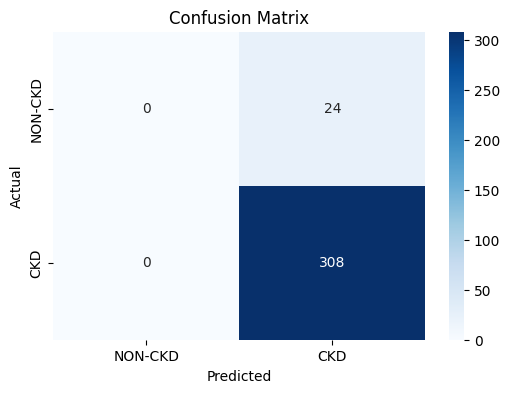

In [ ]:
# 1 ITERATION CONTEXT: RANDOM FOREST
# No oversampling carried and all attributes included


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred, output_dict=True))

labels = [0, 1]
confusion_m = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NON-CKD', 'CKD'], yticklabels=['NON-CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[LightGBM] [Info] Number of positive: 1216, number of negative: 111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7915
[LightGBM] [Info] Number of data points in the train set: 1327, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.916353 -> initscore=2.393792
[LightGBM] [Info] Start training from score 2.393792
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.9307228915662651
{'0': {'precision': 0.6, 'recall': 0.125, 'f1-score': 0.20689655172413793, 'support': 24.0}, '1': {'precision': 0.9357798165137615, 'recall': 0.9935064935064936, 'f1-score': 0.9637795275590552, 'support': 308.0}, 'accuracy': 0.9307228915662651, 'macro avg': {'precision': 0.7678899082568807, 'recall': 0.5592532467532467, 'f1-score': 0.5853380396415966, 'support': 332.0}, 'weighted avg': {'precision': 0.911

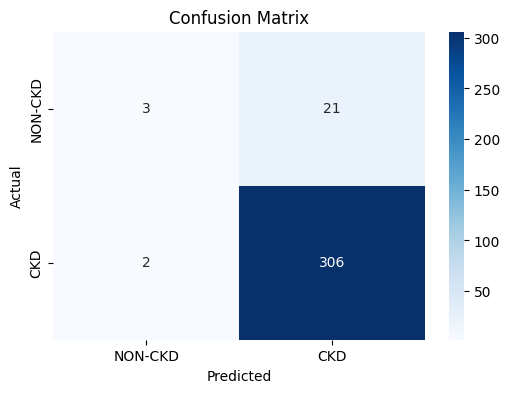

In [ ]:
# 2 ITERATION CONTEXT: LIGHT GRADIENT BOOSTING
# No oversampling carried and all attributes included

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print( classification_report(y_test, y_pred, output_dict=True))
labels = [0, 1]
confusion_m = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NON-CKD', 'CKD'], yticklabels=['NON-CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.927710843373494
{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 24.0}, '1': {'precision': 0.927710843373494, 'recall': 1.0, 'f1-score': 0.9625, 'support': 308.0}, 'accuracy': 0.927710843373494, 'macro avg': {'precision': 0.463855421686747, 'recall': 0.5, 'f1-score': 0.48125, 'support': 332.0}, 'weighted avg': {'precision': 0.8606474089127595, 'recall': 0.927710843373494, 'f1-score': 0.8929216867469879, 'support': 332.0}}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


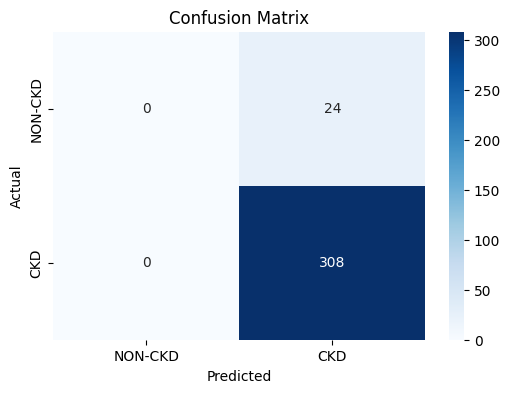

In [ ]:
# 3 ITERATION CONTEXT: SVM
# No oversampling carried and all attributes included

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print( classification_report(y_test, y_pred, output_dict=True))
labels = [0, 1]
confusion_m = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NON-CKD', 'CKD'], yticklabels=['NON-CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9688524590163935
{'0': {'precision': 0.9633333333333334, 'recall': 0.9730639730639731, 'f1-score': 0.9681742043551089, 'support': 297.0}, '1': {'precision': 0.9741935483870968, 'recall': 0.9648562300319489, 'f1-score': 0.9695024077046549, 'support': 313.0}, 'accuracy': 0.9688524590163935, 'macro avg': {'precision': 0.968763440860215, 'recall': 0.968960101547961, 'f1-score': 0.968838306029882, 'support': 610.0}, 'weighted avg': {'precision': 0.9689058699101004, 'recall': 0.9688524590163935, 'f1-score': 0.9688557250902037, 'support': 610.0}}


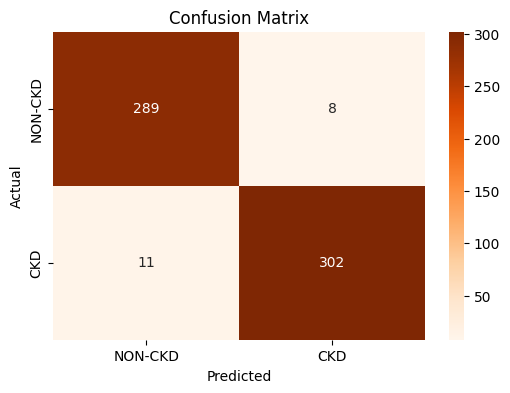

In [ ]:
# scaler = MinMaxScaler()
# X= scaler.fit_transform(X)

model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print( classification_report(y_test, y_pred, output_dict=True))

labels = [0, 1]
confusion_m = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['NON-CKD', 'CKD'], yticklabels=['NON-CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9688524590163935
{'0': {'precision': 0.9633333333333334, 'recall': 0.9730639730639731, 'f1-score': 0.9681742043551089, 'support': 297.0}, '1': {'precision': 0.9741935483870968, 'recall': 0.9648562300319489, 'f1-score': 0.9695024077046549, 'support': 313.0}, 'accuracy': 0.9688524590163935, 'macro avg': {'precision': 0.968763440860215, 'recall': 0.968960101547961, 'f1-score': 0.968838306029882, 'support': 610.0}, 'weighted avg': {'precision': 0.9689058699101004, 'recall': 0.9688524590163935, 'f1-score': 0.9688557250902037, 'support': 610.0}}


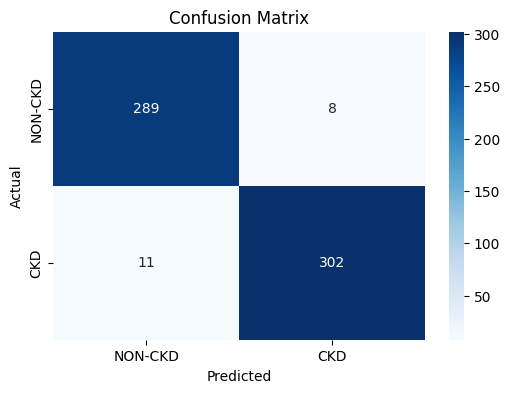

In [ ]:
# 4 ITERATION CONTEXT: RANDOM FOREST
# SMOTE

model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print( classification_report(y_test, y_pred, output_dict=True))

labels = [0, 1]
confusion_m = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['NON-CKD', 'CKD'], yticklabels=['NON-CKD', 'CKD'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[LightGBM] [Info] Number of positive: 1227, number of negative: 1227
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7915
[LightGBM] [Info] Number of data points in the train set: 2454, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.9524590163934427
{'0': {'precision': 0.9379084967320261, 'recall': 0.9663299663299664, 'f1-score': 0.9519071310116086, 'support': 297.0}, '1': {'precision': 0.9671052631578947, 'recall': 0.939297124600639, 'f1-score': 0.9529983792544571, 'support': 313.0}, 'accuracy': 0.9524590163934427, 'macro avg': {'precision': 0.9525068799449604, 'recall': 0.9528135454653026, 'f1-score': 0.9524527551330328, 'support': 610.0}, 'weighted avg': {'precision': 0.9528897883571029, 'recall': 0.952459016

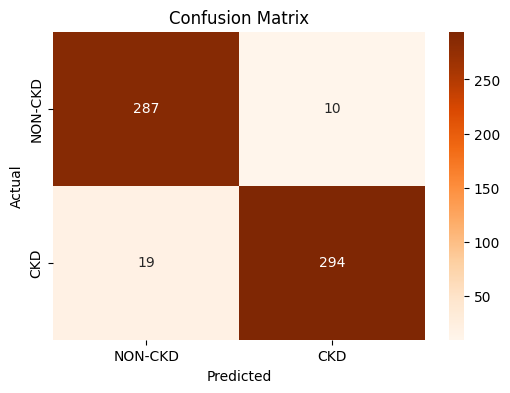

In [ ]:
# 2 ITERATION CONTEXT: LIGHT GRADIENT BOOSTING
# SMOTE

model = LGBMClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print( classification_report(y_test, y_pred, output_dict=True))
labels = [0, 1]
confusion_m = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['NON-CKD', 'CKD'], yticklabels=['NON-CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7622950819672131
{'0': {'precision': 0.7275449101796407, 'recall': 0.8181818181818182, 'f1-score': 0.7702060221870047, 'support': 297.0}, '1': {'precision': 0.8043478260869565, 'recall': 0.7092651757188498, 'f1-score': 0.7538200339558574, 'support': 313.0}, 'accuracy': 0.7622950819672131, 'macro avg': {'precision': 0.7659463681332986, 'recall': 0.763723496950334, 'f1-score': 0.762013028071431, 'support': 610.0}, 'weighted avg': {'precision': 0.7669536194894602, 'recall': 0.7622950819672131, 'f1-score': 0.761798129865121, 'support': 610.0}}


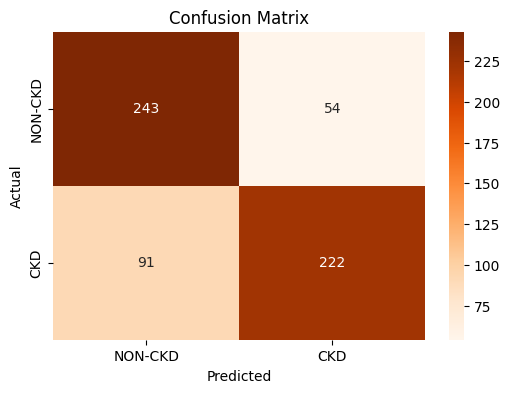

In [ ]:
# 3 ITERATION CONTEXT: SVM
# SMOTE

model = SVC(random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print( classification_report(y_test, y_pred, output_dict=True))

labels = [0, 1]
confusion_m = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['NON-CKD', 'CKD'], yticklabels=['NON-CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install scikit-learn==1.6.1  # match the version used during pickling

In [ ]:
import pickle

# assuming model is your trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
# scaler = MinMaxScaler()
# X= scaler.fit_transform(X)

model = LGBMClassifier()
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 1227, number of negative: 1227
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 2454, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.9540983606557377
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       297
           1       0.98      0.93      0.95       313

    accuracy                           0.95       610
   macro avg       0.96      0.95      0.95       610
weighted avg       0.96      0.95      0.95       610



In [ ]:
# scaler = MinMaxScaler()
# X= scaler.fit_transform(X)
df3 = df.copy()

model = SVC()
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


(1659, 19)
Before:  Counter({1: 1524, 0: 135})
After:  Counter({1: 1524, 0: 1524})
Accuracy: 0.7278688524590164
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       452
           1       0.75      0.69      0.72       463

    accuracy                           0.73       915
   macro avg       0.73      0.73      0.73       915
weighted avg       0.73      0.73      0.73       915



In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Mean Accuracy: 0.9253


In [ ]:

with open('/content/model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
input_data = pd.DataFrame([{
    'BMI': 37,
    'FastingBloodSugar': 0,
    'HbA1c': 0,
    'SerumCreatinine': 0.64,
    'BUNLevels': 48,
    'GFR': 101,
    'ProteinInUrine': 1.26,
    'ACR': 0,
    'SerumElectrolytesSodium': 0,
    'SerumElectrolytesPotassium': 0,
    'SerumElectrolytesCalcium': 0,
    'SerumElectrolytesPhosphorus': 0,
    'HemoglobinLevels': 0,
    'CholesterolTotal': 0,
    'CholesterolLDL': 0,
    'CholesterolHDL': 0,
    'CholesterolTriglycerides': 0,
    'MuscleCramps': 0,
    'Itching': 0
}])


In [ ]:
prediction = model.predict(input_data)
print("Prediction:", prediction)

Prediction: [1]


In [ ]:
!apt-get install -y tesseract-ocr && pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
pip install img2table

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 9.7 MB/s eta 0:00:00


In [ ]:
!pip uninstall opencv-python


Found existing installation: opencv-python 4.11.0.86
Uninstalling opencv-python-4.11.0.86:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/cv2/*
    /usr/local/lib/python3.11/dist-packages/opencv_python-4.11.0.86.dist-info/*
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Core-e7f476e2.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Gui-1ce8cbfe.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Test-9ac3ed15.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Widgets-cd430389.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5XcbQpa-b18b5a78.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libX11-xcb-0e257303.so.1.0.0
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libavcodec-76c43bf0.so.59.37.100
    /usr/loca

In [ ]:
import cv2
print("cv2 version:", cv2.__version__)

try:
    from cv2 import ximgproc
    print("ximgproc loaded:", dir(ximgproc))
    print("Has niBlackThreshold:", hasattr(ximgproc, "niBlackThreshold"))
except Exception as e:
    print("ximgproc not available:", e)


cv2 version: 4.11.0
ximgproc loaded: ['__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']
Has niBlackThreshold: False


In [ ]:
from img2table.document import PDF
from img2table.ocr import TesseractOCR
import pytesseract

pdf = PDF(src="/content/drive/MyDrive/CST3990/template.pdf")

ocr = TesseractOCR(lang="eng")

pdf_tables = pdf.extract_tables(ocr=ocr)
array = {}
for page_num, tables in pdf_tables.items():
    print(f"\n--- Page {page_num} ---")
    for i, table in enumerate(tables):
        print(f"\nTable {i+1}:\n")
        for row in table.content.values():
          test_name = row[0].value
          cleaned_testname = test_name.replace(" ", "")
          results = row[2].value
          array[cleaned_testname] = results
          print([cell.value for cell in row])

print(f'{array}')

expected_data = pd.DataFrame(columns=['BMI', 'FastingBloodSugar',
                                      'HbA1c', 'SerumCreatinine',
                                      'BUNLevels', 'GFR', 'ProteinInUrine',
                                      'ACR', 'SerumElectrolytesSodium',
                                      'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
                                      'SerumElectrolytesPhosphorus', 'HemoglobinLevels',
                                      'CholesterolTotal', 'CholesterolLDL',
                                      'CholesterolHDL', 'CholesterolTriglycerides'])

for key, value in array.items():
  if key in expected_data.columns:
    expected_data.at[0, key] = value
  else:
    print(f'Model does not consider {key}')


expected_data.head(4)

AttributeError: module 'cv2.ximgproc' has no attribute 'niBlackThreshold'